[SKLearn GaussianProcessRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html)

# TODO



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

from sklearn import datasets
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [2]:

training_set = pd.read_csv("training.csv")

N = len(training_set)
K = 10
KN = int(N/K)

training_set = training_set.drop(['Unnamed: 0', 'Date', 'conditions', 'visibility', 'snow', 'snowdepth', 'winddir'], axis=1)
X = training_set.drop(['solar_production'], axis=1)
Y = training_set['solar_production']

In [3]:
train_size = int(KN*(K-1))
res = pd.Series(dtype='float64')
Y_true_tot = pd.Series(dtype='float64')
Y_pred_tot = pd.Series(dtype='float64')
for k in range(K):
    first_split = N-(k+1)*KN
    second_split = first_split+KN
    X_train = pd.concat((X[:first_split], X[second_split:N]))
    Y_train = pd.concat((Y[:first_split], Y[second_split:N]))
    X_test  = X[first_split:second_split]
    Y_test  = Y[first_split:second_split]

    est = HistGradientBoostingRegressor().fit(X_train, Y_train)
    est.score(X_train, Y_train)
    Y_guess = est.predict(X_test)
    Y_true_tot = pd.concat((Y_true_tot, Y_test))
    Y_pred_tot = pd.concat((Y_pred_tot, pd.DataFrame(Y_guess)))
    res = pd.concat((res, abs(Y_test - Y_guess)))

-0.06053478975023263

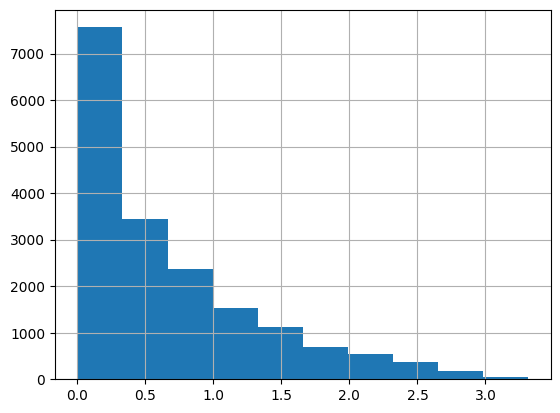

In [4]:
res.hist()
r2_score(Y_true_tot, Y_pred_tot)

In [5]:
Y_pred_tot

,0
0,0.717787
1,0.717787
2,0.717787
3,0.717787
4,0.717787
...,...
1780,0.357201
1781,0.357201
1782,0.026685
1783,0.026685


In [6]:
test_set = pd.read_csv("training.csv")
test_set = test_set.drop(['Unnamed: 0', 'Date', 'conditions', 'visibility', 'snow', 'snowdepth', 'winddir', 'solar_production'], axis=1)
hgbr = HistGradientBoostingRegressor().fit(X, Y)
PREDICTED = hgbr.predict(test_set)
#np.savetxt("kaggle.csv", PREDICTED, delimiter=",")